# 10. Morphological Operations

## Table of Contents
1. [Libraries](#libraries)
2. [Erosion](#erosion)
3. [Dilation](#dilation)
4. [Opening](#opening)
5. [Closing](#closing)
6. [Morphological Gradient](#gradient)
7. [Morphological Hats](#hats)
   1. [Top or White Hat](#top)
   1. [Black Hat](#black)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from google.colab import drive
import cv2
import os
from google.colab.patches import cv2_imshow

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define common constants.
MAX_PIXEL_VALUE = 255

In [ ]:
img = cv2.imread("data/image.jpg")
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("data/image.jpg",0)

In [ ]:
#function to see image
def imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3):
    print(img.shape,img1.shape,img2.shape)
    fig = plt.figure(figsize=(15, 8))
    #adds a subplot at 1st position
    fig.add_subplot(rows,columns,1)
    plt.title('BGR Format')
    plt.imshow(img)

    #adds a subplot at 2nd position
    fig.add_subplot(rows,columns,2)
    plt.title('RGB Format')
    plt.imshow(img1)

    #adds a subplot at 3rd position
    fig.add_subplot(rows,columns, 3)
    plt.title('BGR to GRAY')
    plt.imshow(img2,cmap="gray")
    plt.show()

imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3)

(533, 800, 3) (533, 800, 3) (533, 800)


## Erosion <a class="anchor" id="erosion" ></a>

Erosin primarily involves eroding(thinning) outer surface(foreground) of image
- Tt is suggested to have foreground as white

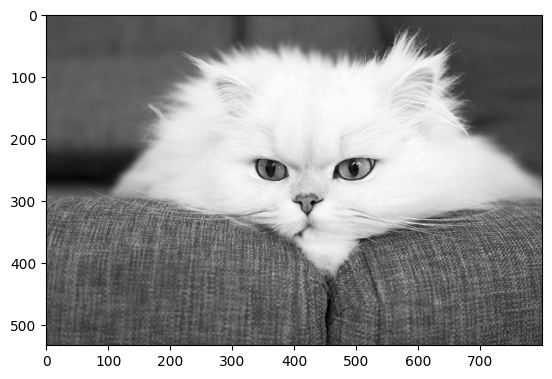

In [ ]:
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(BGR2GRAY,cmap="gray")
plt.show()

Eroding boundy of image upto 3 level

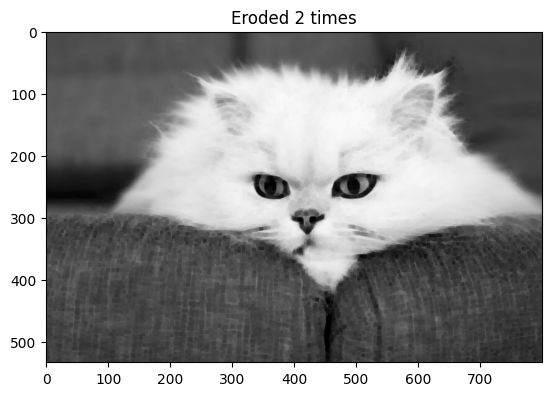

In [ ]:
def plt_imshow(title, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

for i in range(0,3):
    eroded = cv2.erode(BGR2GRAY.copy(), None, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

### Binarize Image

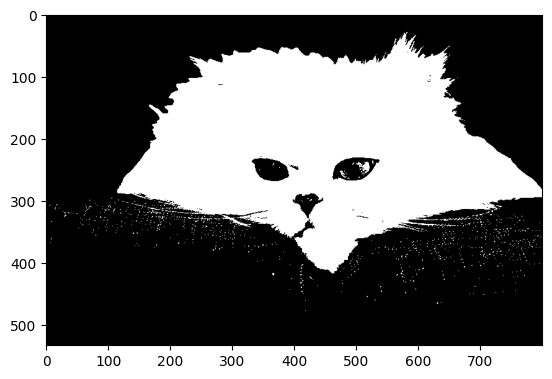

In [ ]:
binr = cv2.threshold(BGR2GRAY, 0, MAX_PIXEL_VALUE, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
image = cv2.cvtColor(binr, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

### We can Invert Image to keep foreground in white

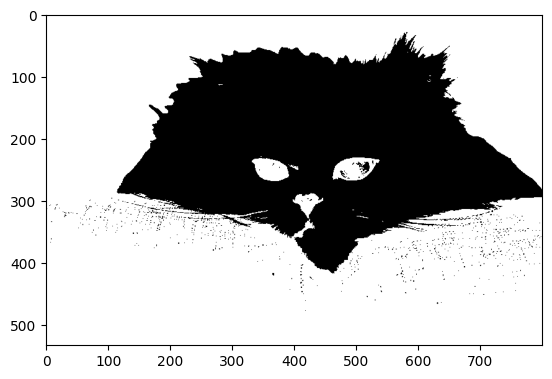

In [ ]:
invert = cv2.bitwise_not(binr)
image = cv2.cvtColor(invert, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

Then, we can define a kernel of $5 \times 5$ to use in erosion

In [ ]:
kernel = np.ones((5,5), np.uint8) #check for 3*3 or 7*7 kernel size too
print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


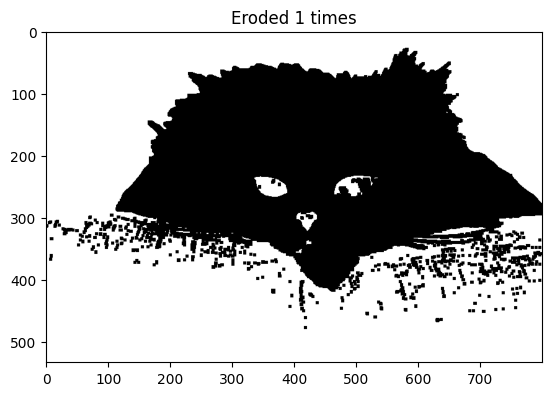

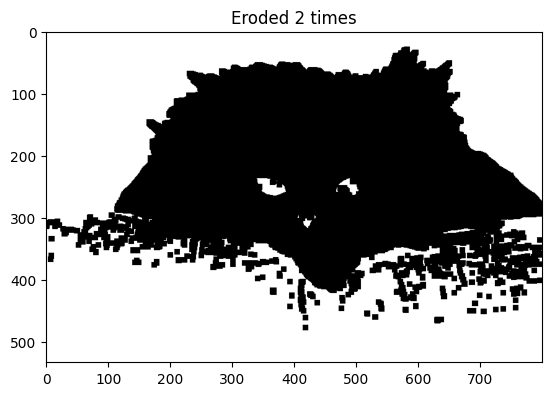

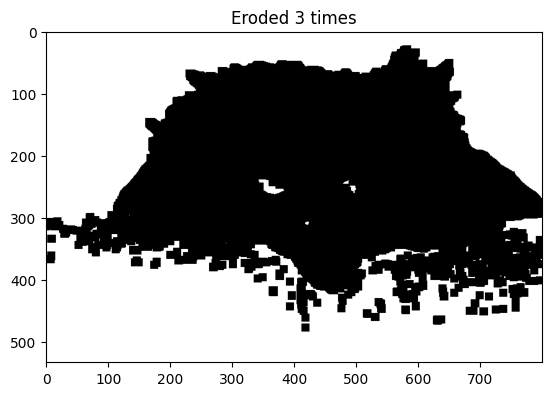

In [ ]:
for i in range(0,3):
    eroded = cv2.erode(invert.copy(),kernel=kernel, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

## Dilation <a class="anchor" id="dilation" ></a>

Involves dilating outer surface (foreground) of image
- For joining broken parts of an image together

In [ ]:
#binarize image
binr = cv2.threshold(BGR2GRAY,0,MAX_PIXEL_VALUE,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
kernel = np.ones((3,3),np.uint8)
invert = cv2.bitwise_not(binr)

#dilate image
dilation = cv2.dilate(binr, kernel, iterations=1)

plt.imshow(dilation, cmap='gray')
plt.show()

We can apply series of dilations on inverted image using no kernel


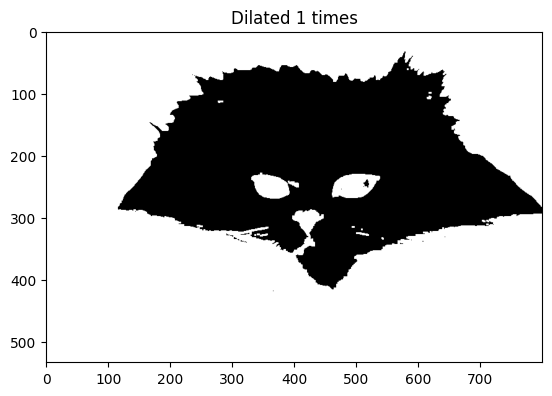

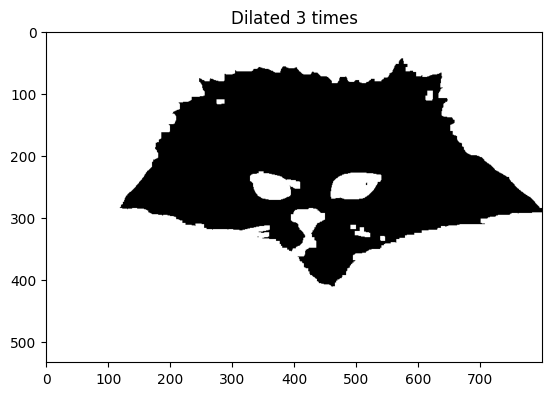

In [ ]:
for i in range(0,3):
    dilated = cv2.dilate(invert.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

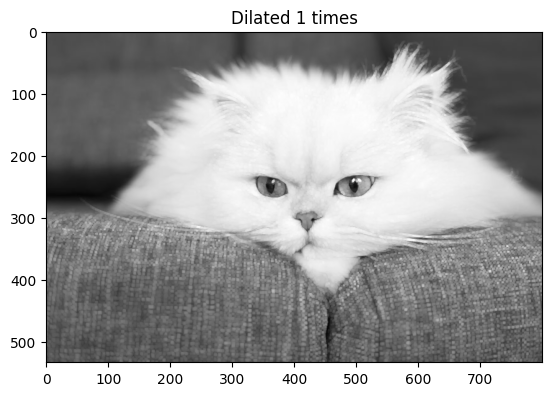

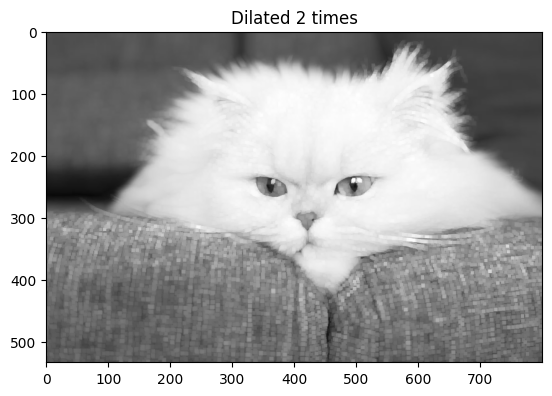

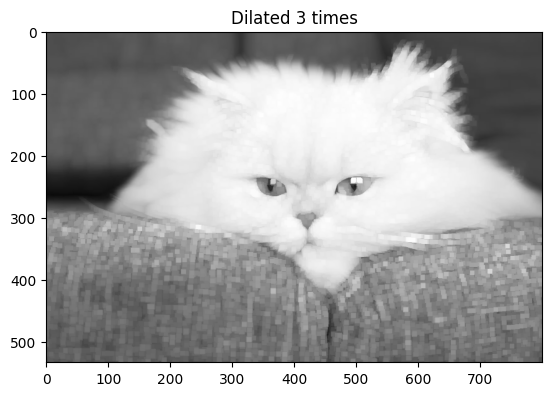

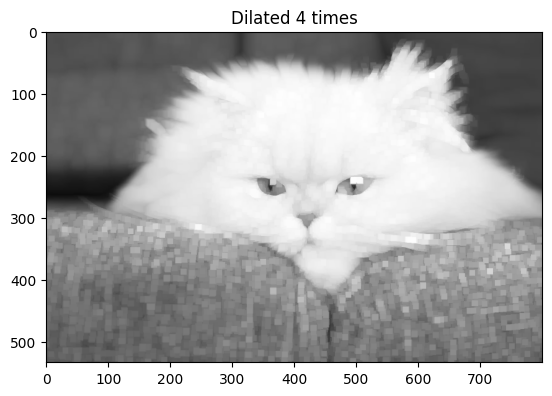

In [ ]:
for i in range(0,4):
    dilated = cv2.dilate(BGR2GRAY.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

## Opening <a class="anchor" id="opening" ></a>

Erosion followed by dilation in outer surface (foreground) of image
- Generally used to remove noise (small blobs) in image


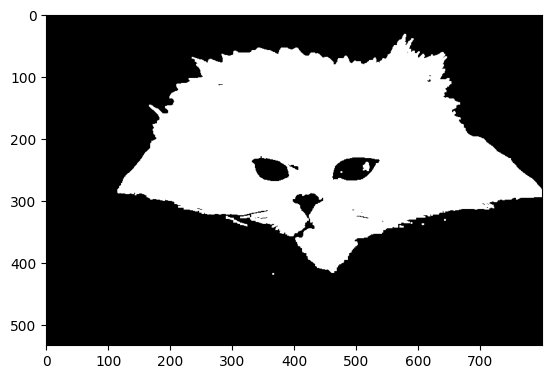

In [ ]:
#opening image
opening = cv2.morphologyEx(binr,cv2.MORPH_OPEN,kernel,iterations=1)

#print output
plt.imshow(opening, cmap='gray')
plt.show()

In [ ]:
for i in range(0,3):
    opening = cv2.morphologyEx(binr.copy(),cv2.MORPH_OPEN,None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),opening)
    plt.show()

## Closing <a class="anchor" id="closing" ></a>

Dilation followed by erosion in outer surface (foreground) of image
- Generally used to close holes inside of objects or for connecting components together

In [ ]:
#closing image
closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel, iterations=1)

#print output
plt.imshow(closing,cmap='gray')
plt.show()

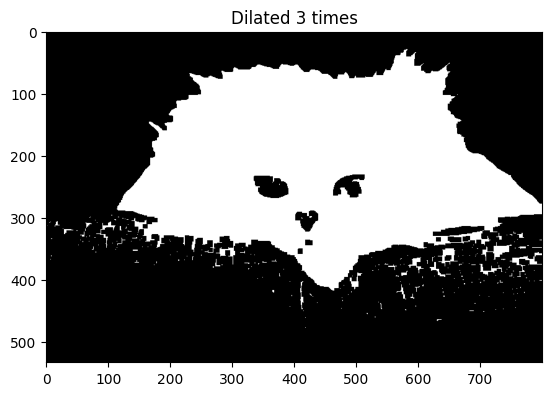

In [ ]:
for i in range(0,3):
    closing = cv2.morphologyEx(binr.copy(),cv2.MORPH_CLOSE,None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),closing)
    plt.show()

Iterating with different kernels

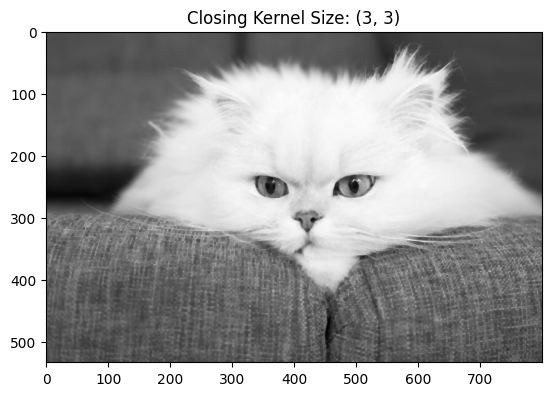

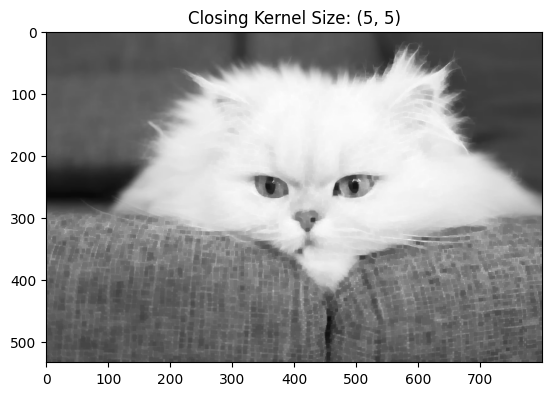

In [ ]:
kernelSizes = [(3,3), (5,5), (7,7)]
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    closing = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_CLOSE, kernel)
    plt_imshow("Closing Kernel Size: ({}, {})".format(kernelSize[0], kernelSize[1]), closing)

## Morphological Gradient <a class="anchor" id="gradient" ></a>

It first applies erosion and dilation individually on image and then computes difference between eroded and dilated image

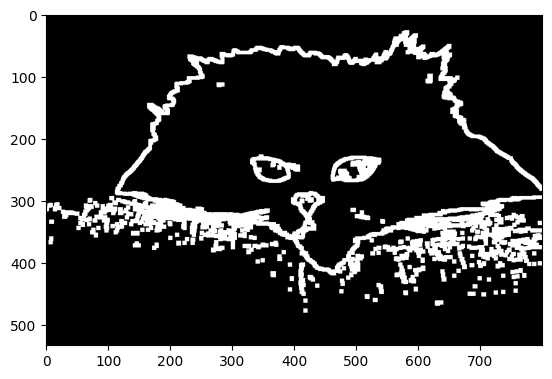

In [ ]:
# use morph gradient
morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel)

#print output
plt.imshow(morph_gradient, cmap='gray')
plt.show()

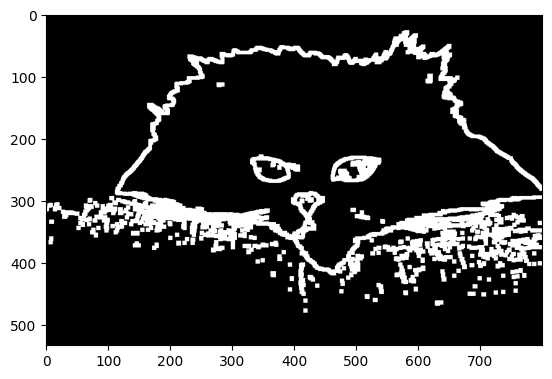

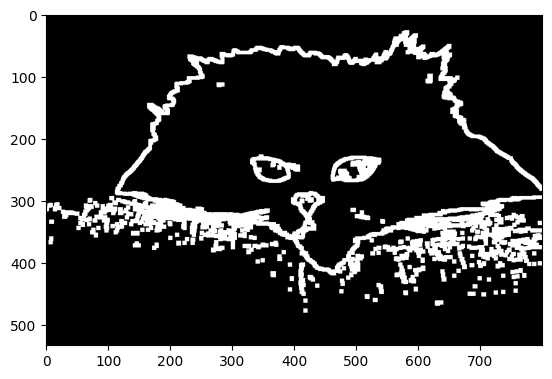

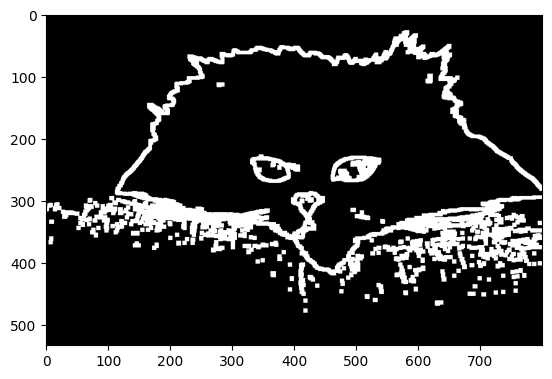

In [ ]:
for i in range(0,3):
    # use morph gradient
    morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel+i)
    #print output
    plt.imshow(morph_gradient, cmap='gray')
    plt.show()

Iterating with different kernels

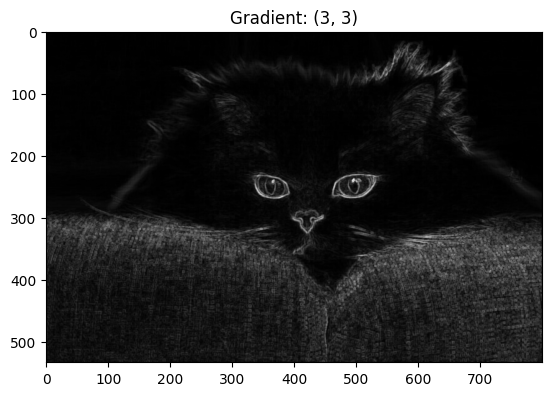

In [ ]:
kernelSizes = [(3,3), (5,5), (7,7)]
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    gradient = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_GRADIENT, kernel)
    plt_imshow("Gradient: ({}, {})".format(
        kernelSize[0], kernelSize[1]), gradient)

## Morphological Hats <a class="anchor" id="hats" ></a>

1. Top or White Hat
2. Black hat

### Top or White Hat <a class="anchor" id="top" ></a>

It is the difference between original (grayscale/single channel) input image and opening image

- Finds light(bright) regions of an image on dark background


In [ ]:
#construct a kernel (13x5)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(13,5))
kernel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

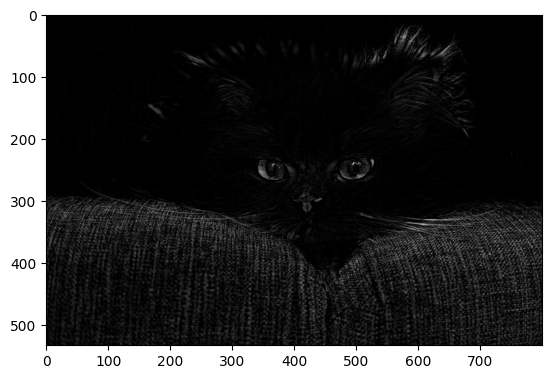

In [ ]:
tophat = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_TOPHAT, kernel)

plt.imshow(tophat, cmap='gray')
plt.show()

### Black Hat <a class="anchor" id="black" ></a>

Output is a difference between input image & opened image
- Finds dark regions on a light background


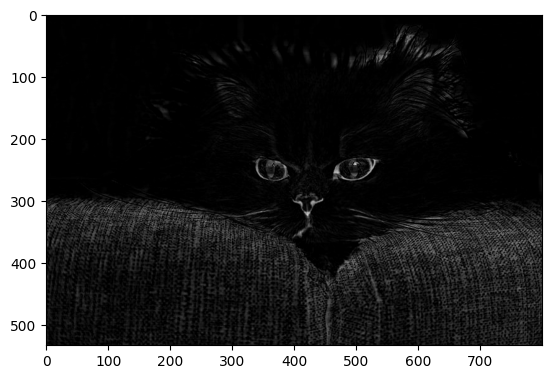

In [ ]:
blackhat = cv2.morphologyEx(BGR2GRAY,cv2.MORPH_BLACKHAT,kernel)

plt.imshow(blackhat, cmap='gray')
plt.show()

## Homework <a class="anchor" id="homework" ></a>

### a) Investigate an application of erosion in image processing and implement it in Colab

**Text identification from images:**

Consider an image of a document containing some unwanted noise, like small dots or stray pixels, that can hinder text clarity. In such cases, erosion becomes a practical solution for enhancing text visibility. By applying erosion, which gradually erodes the edges of undesirable elements, we can effectively remove minor noise while preserving the main text structure. This is how erosion can serve as tool in preprocessing images, helping to improve the quality of document images and facilitating more accurate text extraction.

In [ ]:
# Common constants.
BLOCK_SIZE = 11
ADAPTIVE_CONSTANT = 2
NOISE_AMOUNT = 0.005

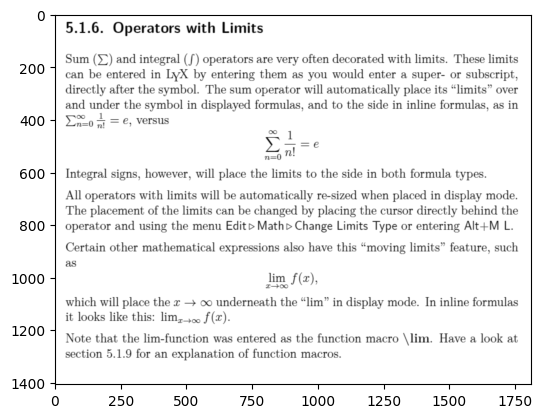

In [ ]:
image = cv2.imread('data/image-with-text.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray, cmap='gray')

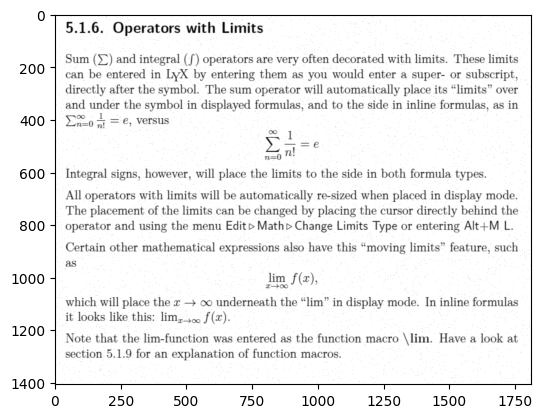

In [ ]:
# Add salt-and-pepper noise to simulate small dots.
image_with_dots = random_noise(image_gray / float(MAX_PIXEL_VALUE), mode='s&p', amount=NOISE_AMOUNT) * MAX_PIXEL_VALUE
image_with_dots = np.uint8(image_with_dots)

plt.imshow(image_with_dots, cmap='gray')

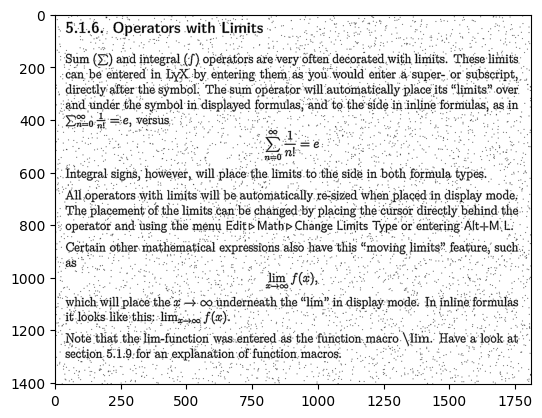

In [ ]:
# Let's apply Gaussian blur to reduce noise before applying erosion and binarize the image.
image_blurred = cv2.GaussianBlur(image_with_dots, (5, 5), 0)

binary_image = cv2.adaptiveThreshold(
    np.uint8(image_blurred),
    MAX_PIXEL_VALUE,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    BLOCK_SIZE,
    ADAPTIVE_CONSTANT
)

plt.imshow(binary_image, cmap='gray')

In [ ]:
mask = np.ones((4, 4), np.uint8)
eroded_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, mask)

plt.imshow(eroded_image, cmap='gray')

### b) Investigate an application of dilation in image processing and implement it in Colab

**Image processing for astrophotography:**

Dilation can make deep sky objects more visible, and it can fill small gaps in the object enhancing specific characteristics in astronomical images.

In [ ]:
# Load the image
crab_nebula = cv2.imread('data/crab-nebula.jpg')
crab_nebula_gray = cv2.cvtColor(crab_nebula, cv2.COLOR_BGR2GRAY)

plt.imshow(crab_nebula_gray, cmap='gray')

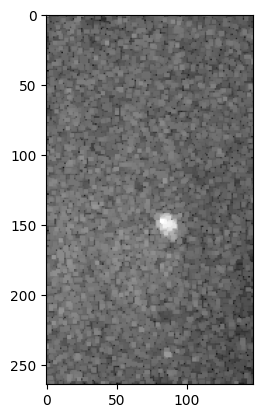

In [ ]:
# Create kernel for dilation
kernel = np.ones((3, 3), np.uint8)
# Apply erotion first
crab_nebula_erosion = cv2.erode(crab_nebula_gray, kernel, iterations = 1)
# Apply dilation
crab_nebula_dilation = cv2.dilate(crab_nebula_erosion, kernel, iterations = 1)

plt.imshow(crab_nebula_dilation, cmap='gray')


### C) Investigate an opening and closing application and implement it in Google Colab

In [ ]:
# Load the image
os.chdir('/content/drive/My Drive/')
image_path = "/content/drive/My Drive/crab-nebula.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
# Check if image loaded successfully
if image is None:
    print("Error: Could not read image.")
else:
    # Define the kernel size
    kernel_size = 5
    kernel = np.ones((kernel_size, kernel_size), np.uint8)

Original Image:


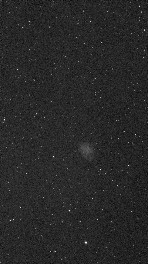

In [ ]:
# Display the original image using cv2_imshow
print("Original Image:")
cv2_imshow(image)

#### Opening operation



What it does: The opening operation performs erosion followed by dilation.

Purpose: It is used to remove small objects or noise from an image while preserving the shape and size of larger objects. Opening can smooth the contour of an object, break narrow isthmuses, and eliminate thin protrusions.

In [ ]:
# Opening: Erosion followed by dilation
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

How it works:
Erosion removes pixels on object boundaries. It makes objects smaller, eliminates small imperfections, and separates objects connected by thin bridges.
Dilation then adds pixels to the boundaries of objects. It can restore the size of the original object (if not eroded too much) while keeping the imperfections removed.

After Opening:


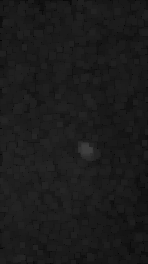

In [ ]:
print("After Opening:")
cv2_imshow(opening)

The opening of set A by structuring element B, denoted by A ◽ B, is defined as

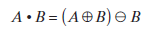

The opening of A by B is the union of all the translations of B so that B fits entirely in A.

The next figure shows an image containing a set (geometrical object) A above a white background, and Image "*I*" is a solid, circular structuring element.
Next, we show some of the translations of circle B such that it is contained
within figure A, and the set shown shaded at the end is the union of all such possible translations.

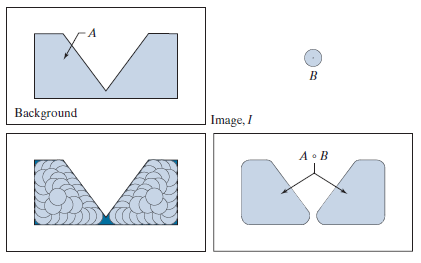

As an equation:

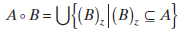

#### Closing operation

What it does: The closing operation performs dilation followed by erosion.

Purpose: It is used to close small holes inside foreground objects or small black points on objects. Closing can also smooth contours, fuse narrow breaks and long thin gulfs, eliminate small holes, and fill gaps in the contour.

In [ ]:
# Closing: Dilation followed by erosion
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

How it works:
Dilation first adds pixels to the boundaries of objects, potentially closing small holes and connecting nearby objects.
Erosion follows, removing pixels from object boundaries. It tends to restore the object to its original size while keeping the holes filled and the objects fused by the dilation.

In [ ]:
print("After Closing:")
cv2_imshow(closing)

After Closing:


The closing of set A by structuring element B, denoted A ◽ B, is defined
as

imagen.png

Closing has a similar geometric interpretation, except that now we translate circle B outside of geometric figure A.

The closing is then the complement of the union of all translations of B that do not overlap A.

This figure illustrates this concept. Note that the boundary of the closing is determined by the furthest points B could reach without going inside any part of A.

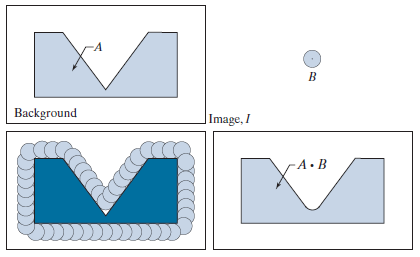

Based on this interpretation, we can write the closing of A by B as

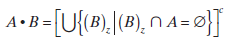